# DATA 620 Assignment 5
### High Frequency Words
### Steven Ellingson
For this assignment, I decided to load the NLP textbook and check it out.


In [1]:
import nltk
import io
from pdfminer.pdfinterp import PDFResourceManager, PDFPageInterpreter
from pdfminer.converter import TextConverter
from pdfminer.layout import LAParams
from pdfminer.pdfpage import PDFPage
import enchant as pe
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import warnings
import os

warnings.filterwarnings('ignore')
os.chdir('C:\\Users\\steven.ellingson\\PycharmProjects\\cuny')

In [2]:
#This Function was borrowed from here: https://stackoverflow.com/questions/26494211/extracting-text-from-a-pdf-file-using-pdfminer-in-python

def convert_pdf_to_txt(path):
    rsrcmgr = PDFResourceManager()
    retstr = io.StringIO()
    laparams = LAParams()
    device = TextConverter(rsrcmgr, retstr,
                           laparams=laparams)
    fp = open(path, 'rb')
    interpreter = PDFPageInterpreter(rsrcmgr, device)
    password = ""
    maxpages = 0
    caching = True
    pagenos = set()

    for page in PDFPage.get_pages(fp, pagenos, maxpages=maxpages,
                                  password=password,
                                  caching=caching,
                                  check_extractable=True):
        interpreter.process_page(page)



    fp.close()
    device.close()
    text = retstr.getvalue()
    retstr.close()
    return text

In [3]:
raw = convert_pdf_to_txt('data 620\\naturallanguageprocessingwithpython.pdf')
text = nltk.Text(nltk.word_tokenize(raw))

I'm going to move this to a Pandas Dataframe so I can add more attributes to these words

In [4]:
df = pd.DataFrame.from_dict(nltk.FreqDist(w.lower() for w in text if w.isalpha()), orient='index',columns=['freq'])
print("There are " + str(len(df)) + " unique words in this corpus!")

There are 8894 unique words in this corpus!


In [5]:
df.sort_values('freq',ascending=False,inplace=True)
df.head(10)

,freq
the,8294
a,4749
of,4580
to,3702
in,3367
and,3244
is,2315
for,2156
we,2051
that,1727


These are the most common words in the language. Let's get rid of the stopwords and see how it looks

In [21]:
stop_words = set(nltk.corpus.stopwords.words('english')) 
df[df.index.isin(stop_words)==False].head(20)

,freq,dict_word,rank,rel_freq,cum_sum
word,790,True,19.0,0.005349,0.306737
text,784,True,20.0,0.005308,0.312045
words,733,True,21.0,0.004963,0.317007
example,532,True,30.0,0.003602,0.353412
using,517,True,31.0,0.003500,0.356913
x,510,True,32.0,0.003453,0.360366
use,453,True,34.0,0.003067,0.366669
python,447,True,35.0,0.003026,0.369695
language,442,True,37.0,0.002993,0.375694
data,433,True,38.0,0.002932,0.378626


OK, so we have words about words and language (words, text, corpus), words about programming (python, n), and some words that likely wouldn't be thought of as in the actual text (chapter, example).

As far as the differences compared to "all words", this list is a good start - I wouldn't expect to find these very often in most books.

Let's get rid of all English words and see what comes out of it.

In [6]:
d = pe.Dict("en_US")
df['dict_word'] = [d.check(w) for w in df.index]
df[df['dict_word']==False].sort_values('freq',ascending=False).head(20)

,freq,dict_word
np,381,False
nltk,217,False
len,182,False
vp,173,False
http,155,False
nlp,97,False
det,79,False
xml,73,False
nn,72,False
synset,67,False


You can see that many of the non-dictionary words are code-related. If I could figure out how to separate the code blocks from actual text that might be informative.

In [7]:
df['rank'] = df['freq'].rank(method="first", ascending=False)
df['rel_freq'] = df['freq'] / df['freq'].sum()
df['cum_sum'] = df['rel_freq'].cumsum()
df.head(10)

,freq,dict_word,rank,rel_freq,cum_sum
the,8294,True,1.0,0.056154,0.056154
a,4749,True,2.0,0.032153,0.088307
of,4580,True,3.0,0.031009,0.119316
to,3702,True,4.0,0.025064,0.144381
in,3367,True,5.0,0.022796,0.167177
and,3244,True,6.0,0.021963,0.189140
is,2315,True,7.0,0.015674,0.204814
for,2156,True,8.0,0.014597,0.219411
we,2051,True,9.0,0.013886,0.233297
that,1727,True,10.0,0.011693,0.244990


Let's use the Pandas cumulative sum function to get see how many words it takes to get to half the total frequency.

In [8]:
print ('The top ' + str(sum(df.cum_sum < 0.5)) + ' most frequent words make up 1/2 of the words in this book!')

The top 104 most frequent words make up 1/2 of the words in this book!


Here are the 200 most frequent words.

In [9]:
df200 = df.head(200)
list(df200.index)

['the',
 'a',
 'of',
 'to',
 'in',
 'and',
 'is',
 'for',
 'we',
 'that',
 'this',
 'as',
 'are',
 'can',
 'it',
 'with',
 'be',
 's',
 'word',
 'text',
 'words',
 'by',
 'an',
 'on',
 'if',
 'or',
 'from',
 'you',
 'have',
 'example',
 'using',
 'x',
 'will',
 'use',
 'python',
 'not',
 'language',
 'data',
 'which',
 'at',
 'more',
 'set',
 'list',
 'chapter',
 'corpus',
 'np',
 'each',
 'such',
 'these',
 'some',
 'sentence',
 'n',
 'function',
 'one',
 'see',
 'all',
 'how',
 'grammar',
 'print',
 'then',
 'when',
 'other',
 'what',
 'has',
 'into',
 'two',
 'w',
 'i',
 't',
 'feature',
 'features',
 'value',
 'our',
 'there',
 'but',
 'do',
 'used',
 'its',
 'tag',
 'also',
 'string',
 'structure',
 'so',
 'any',
 'nltk',
 'information',
 'following',
 'your',
 'first',
 'about',
 'p',
 'sentences',
 'tagger',
 'processing',
 'type',
 'like',
 'v',
 'up',
 'they',
 'file',
 'most',
 'out',
 'section',
 'len',
 'code',
 'than',
 'tags',
 'given',
 'new',
 'b',
 'just',
 'vp',
 'whe

Here is a plot of the top 200 words.

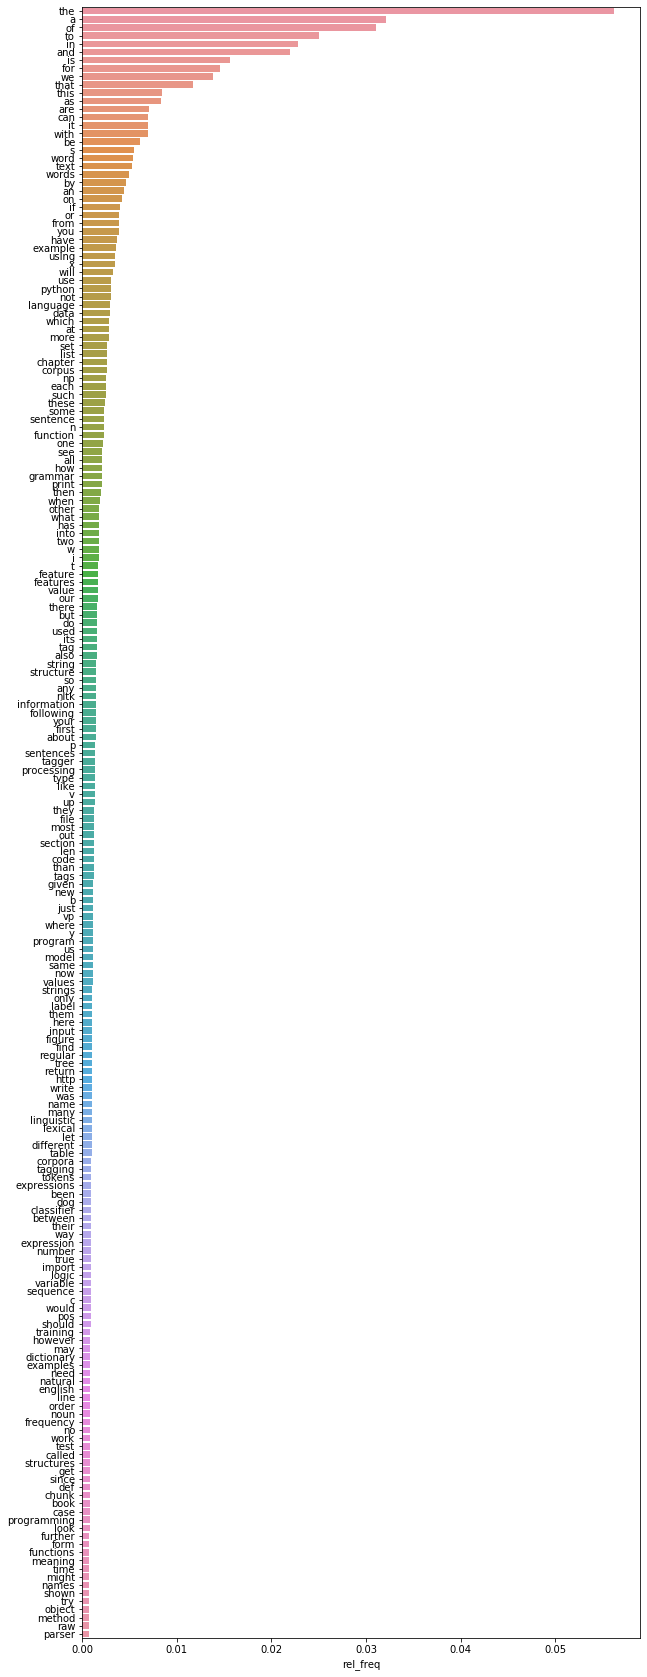

In [10]:
plt.figure(figsize=(10,30))
x = sns.barplot(y=df200.index,x=df200['rel_freq'])
plt.show()

OK, now let's plot the relative frequency and also plot the Zipf function at different constants.

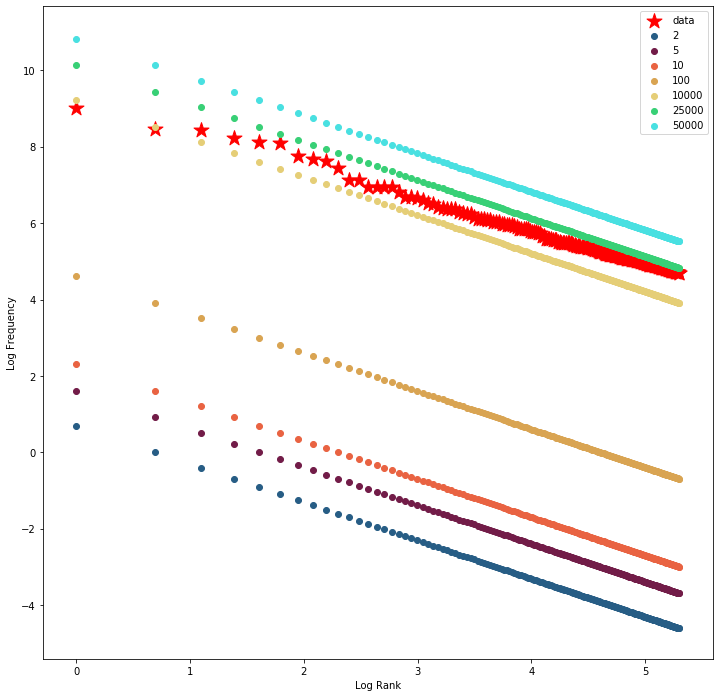

In [14]:
colors = ('#b0cbf2', '#275d85', '#721c48', '#e96342', '#d9a452', '#e5ce77', '#38d076', '#49e0e1', '#e9a9b5', '#7f7ff0', '#eb7ff6')
ks = (2,5,10,100,10000,25000,50000)
plt.figure(figsize=(12, 12))
ax = plt.subplot()
ax.scatter(np.log(df200['rank']),np.log(df200['freq']), color="red",marker='*',s=250, label = 'data')
i = 0
for k in ks:
    i = i+1
    ax.scatter(np.log(df200['rank']),np.log(k/df200['rank']), color=colors[i], label = k)
ax.legend()
ax.set_xlabel('Log Rank')
ax.set_ylabel('Log Frequency')
ax.legend()

plt.show()

Does it follow Zipf's law? Well not exactly. You can see the slope is a little more flat than the zipf function plots.  